# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$\nabla_wQ(w) = \frac{-2}{\ell}(y - Xw)^TXdw$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [21]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['notRepairedDamage']



# YOUR CODE (EDA):

In [9]:
brand_counts = data['model'].value_counts()
top_20_brands = brand_counts.nlargest(20).index
filtered_df = data[data['model'].isin(top_20_brands)]

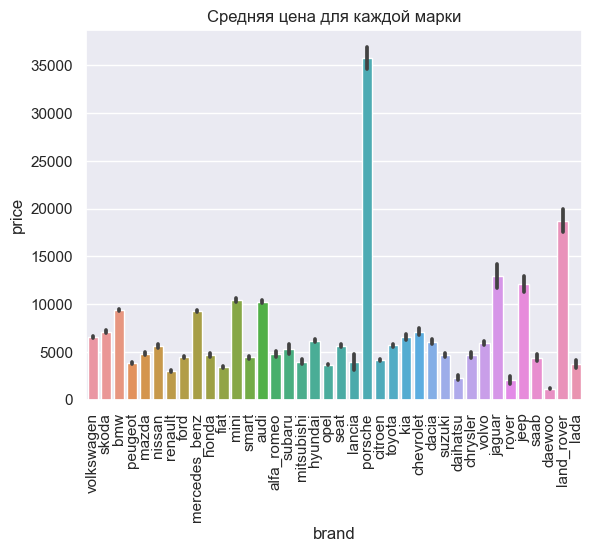

In [10]:
sns.barplot(x='brand', y='price', data=data)
plt.xticks(rotation=90)
plt.title("Средняя цена для каждой марки")
plt.show()

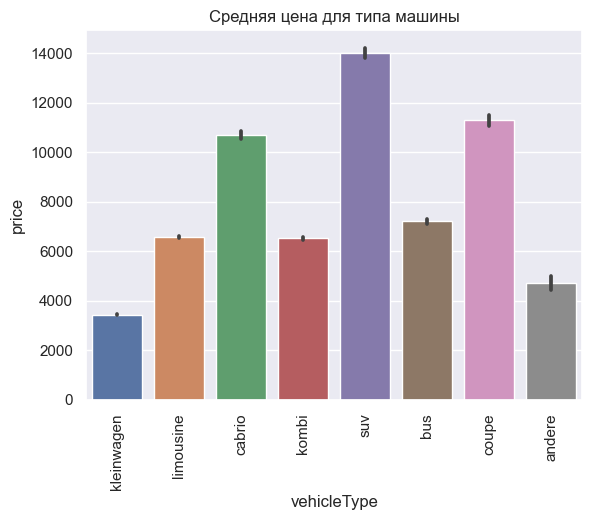

In [11]:
sns.barplot(x='vehicleType', y='price', data=data)
plt.xticks(rotation=90)
plt.title("Средняя цена для типа машины")
plt.show()

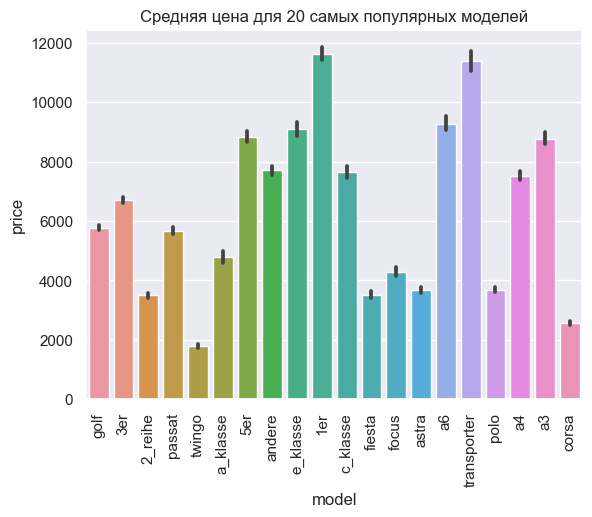

In [12]:
sns.barplot(x='model', y='price', data=filtered_df)
plt.xticks(rotation=90)
plt.title("Средняя цена для 20 самых популярных моделей")
plt.show()

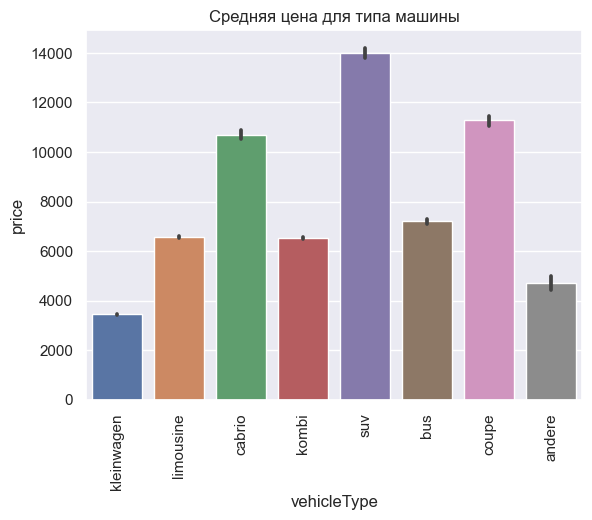

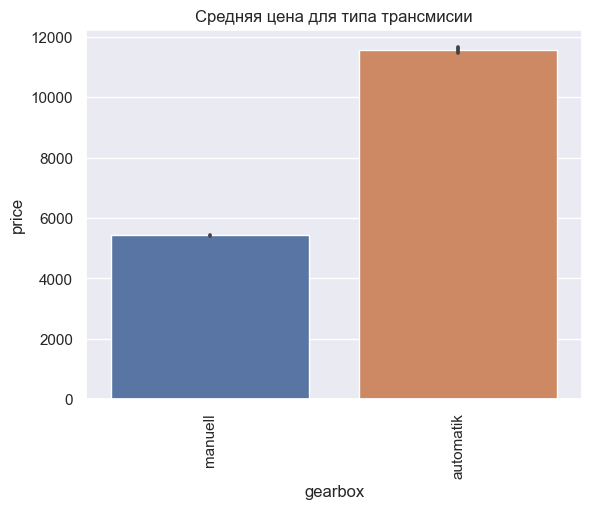

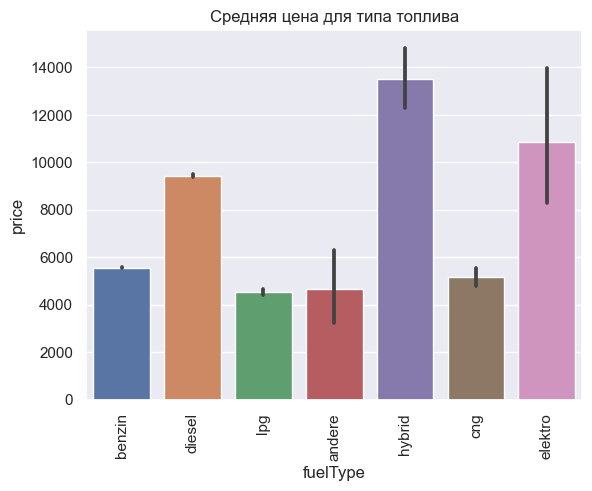

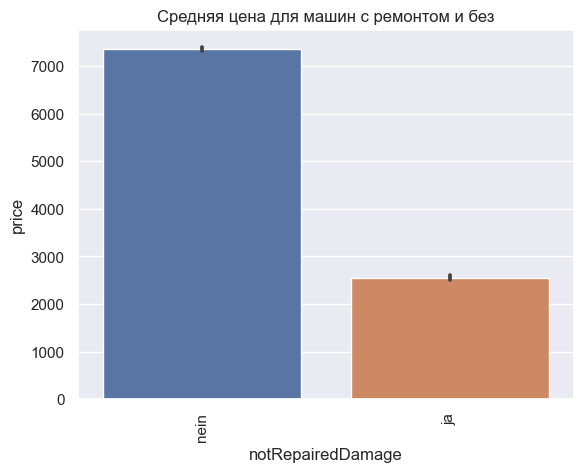

In [13]:
sns.barplot(x='vehicleType', y='price', data=data)
plt.xticks(rotation=90)
plt.title("Средняя цена для типа машины")
plt.show()

sns.barplot(x='gearbox', y='price', data=data)
plt.xticks(rotation=90)
plt.title("Средняя цена для типа трансмисии")
plt.show()

sns.barplot(x='fuelType', y='price', data=data)
plt.xticks(rotation=90)
plt.title("Средняя цена для типа топлива")
plt.show()

sns.barplot(x='notRepairedDamage', y='price', data=data)
plt.xticks(rotation=90)
plt.title("Средняя цена для машин с ремонтом и без")
plt.show()

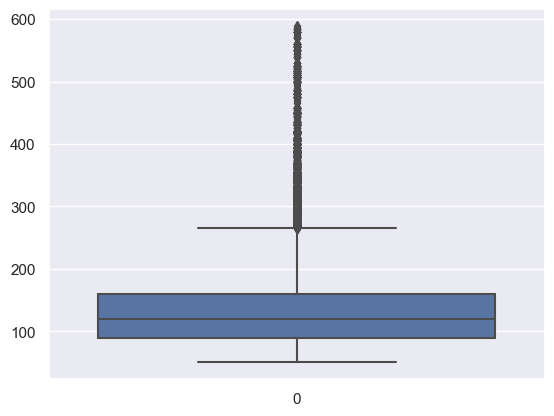

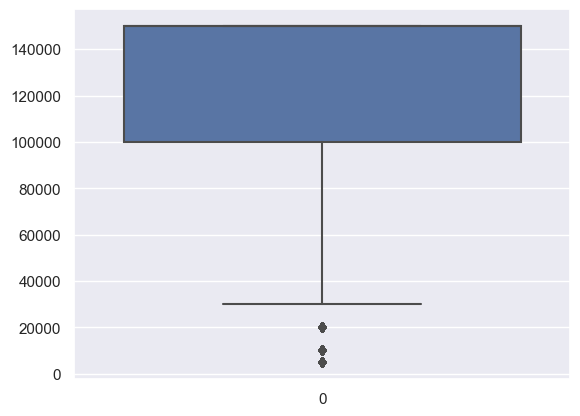

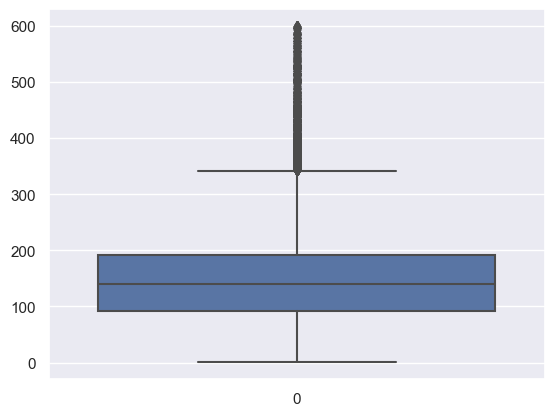

In [14]:
# sns.scatterplot(x='powerPS', y='price', data=data)
sns.boxplot(data['powerPS'])
plt.show()

sns.boxplot(data['kilometer'])
plt.show()

sns.boxplot(data['autoAgeMonths'])
plt.show()

In [15]:
new_data = data[data['powerPS'] < 300]
new_data = new_data[new_data['kilometer'] > 20000]
new_data = new_data[new_data['autoAgeMonths'] < 350]

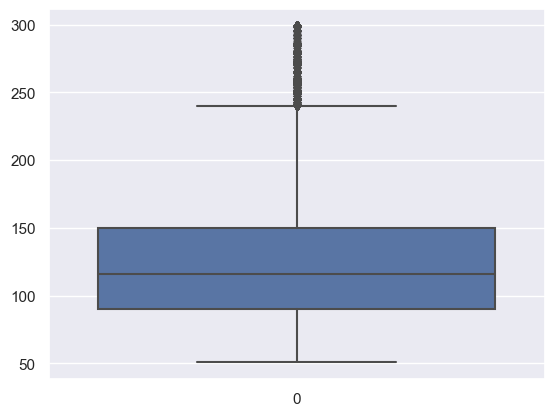

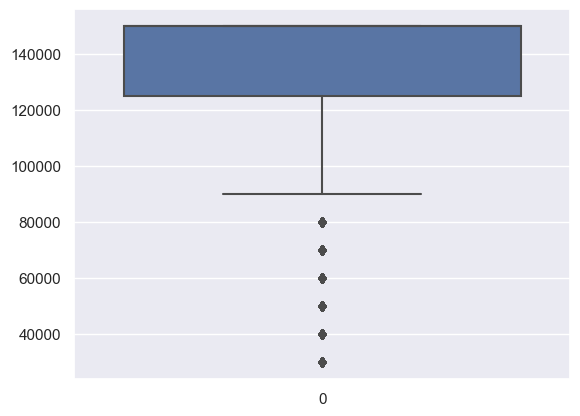

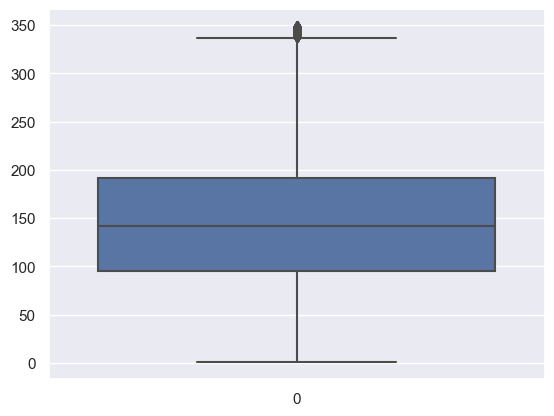

In [16]:
sns.boxplot(new_data['powerPS'])
plt.show()

sns.boxplot(new_data['kilometer'])
plt.show()

sns.boxplot(new_data['autoAgeMonths'])
plt.show()

* Подумайте, какие трансформации признаков из известных вам будет уместно применить;
* Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [17]:
data = new_data

In [18]:
data

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000
...,...,...,...,...,...,...,...,...,...,...
241184,seat,leon,limousine,manuell,diesel,nein,105,150000,93,4400
241185,volkswagen,golf,limousine,manuell,diesel,nein,140,150000,69,7900
241186,seat,leon,limousine,manuell,benzin,ja,225,150000,142,3200
241187,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,192,1199


In [19]:
data.loc[data['notRepairedDamage'] == 'ja', 'notRepairedDamage'] = 1
data.loc[data['notRepairedDamage'] == 'nein', 'notRepairedDamage'] = 0

In [22]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other', 'passthrough', other)
])

x = column_transformer.fit_transform(x)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test_val, y_train, y_test_val = train_test_split(x, y, train_size=0.8)

X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, train_size=0.5)




## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [27]:
from descents import *
from sklearn.metrics import r2_score

In [49]:
X_train = X_train.toarray()
X_test = X_test.toarray()
X_val = X_val.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [51]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [68]:
lambdas = np.logspace(-4, 1, 20)

best_lambda = [0, 0, 0, 0]
score = [-1, -1, -1, -1]

losses = [[], [], [], []]
iters = [[], [], [], []]

names = ['adam', 'full', 'stochastic', 'momentum']

for l in lambdas:
    for i in range(4):

        print(l, i)

        d = {'descent_name': names[i], 'regularized': False, 'kwargs': {'dimension': X_train.shape[1], 'lambda_': l}}

        lr = LinearRegression(d)
        lr.fit(X_val, y_val)

        pred = lr.predict(X_train)

        r2 = r2_score(y_train, pred)
        loss = lr.calc_loss(X_train, y_train)

        losses[i].append(loss)

        if r2 > score[i]:
            best_lambda[i] = l
            score[i] = r2
            
        iters[i].append(len(lr.loss_history))

print(lambdas)

print(score)

0.0001 0
0.0001 1
0.0001 2
0.0001 3
0.00018329807108324357 0
0.00018329807108324357 1
0.00018329807108324357 2
0.00018329807108324357 3
0.0003359818286283781 0
0.0003359818286283781 1
0.0003359818286283781 2
0.0003359818286283781 3
0.0006158482110660267 0
0.0006158482110660267 1
0.0006158482110660267 2
0.0006158482110660267 3
0.0011288378916846883 0
0.0011288378916846883 1
0.0011288378916846883 2
0.0011288378916846883 3
0.00206913808111479 0
0.00206913808111479 1
0.00206913808111479 2
0.00206913808111479 3
0.00379269019073225 0
0.00379269019073225 1
0.00379269019073225 2
0.00379269019073225 3
0.0069519279617756054 0
0.0069519279617756054 1
0.0069519279617756054 2
0.0069519279617756054 3
0.012742749857031334 0
0.012742749857031334 1
0.012742749857031334 2
0.012742749857031334 3
0.023357214690901212 0
0.023357214690901212 1
0.023357214690901212 2
0.023357214690901212 3
0.04281332398719392 0
0.04281332398719392 1
0.04281332398719392 2
0.04281332398719392 3
0.07847599703514607 0
0.07847599

/Users/danyapetrovich/Desktop/ML_HW/ml-course-hse/2023-fall/homeworks-practice/homework-practice-03-gd/descents.py:82: RuntimeWarning: overflow encountered in matmul
  return 1 / L * (y - x_w).T @ (y - x_w)
/Users/danyapetrovich/Desktop/ML_HW/ml-course-hse/2023-fall/homeworks-practice/homework-practice-03-gd/venv/lib/python3.7/site-packages/sklearn/metrics/_regression.py:805: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
/Users/danyapetrovich/Desktop/ML_HW/ml-course-hse/2023-fall/homeworks-practice/homework-practice-03-gd/descents.py:82: RuntimeWarning: overflow encountered in matmul
  return 1 / L * (y - x_w).T @ (y - x_w)


10.0 2
10.0 3
[1.00000000e-04 1.83298071e-04 3.35981829e-04 6.15848211e-04
 1.12883789e-03 2.06913808e-03 3.79269019e-03 6.95192796e-03
 1.27427499e-02 2.33572147e-02 4.28133240e-02 7.84759970e-02
 1.43844989e-01 2.63665090e-01 4.83293024e-01 8.85866790e-01
 1.62377674e+00 2.97635144e+00 5.45559478e+00 1.00000000e+01]
[-0.8210803495784613, 0.7207413415381939, 0.6563727146195888, 0.7564685444705561]


In [70]:
best_lambda

[0.0069519279617756054,
 1.623776739188721,
 1.623776739188721,
 1.623776739188721]

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

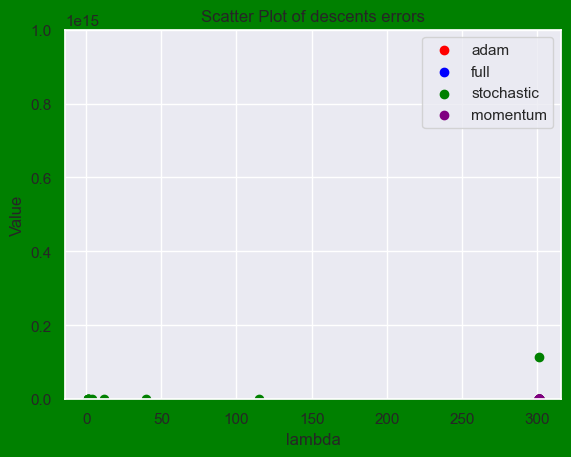

In [82]:
plt.figure(facecolor='green')
plt.scatter(iters[0], losses[0], color='red', label='adam')
plt.scatter(iters[1], losses[1], color='blue', label='full')
plt.scatter(iters[2], losses[2], color='green', label='stochastic')
plt.scatter(iters[3], losses[3], color='purple', label='momentum')

plt.ylim(0, 1e15)

plt.legend()

plt.xlabel('lambda')
plt.ylabel('Value')
plt.title('Scatter Plot of descents errors')

plt.show()

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [81]:
import time

In [83]:
batch_sizes = np.arange(5, 500, 10)
k = 10

sgd_iters = []
duration = []

for batch_size in batch_sizes:
    av_iter = 0
    av_duration = 0
    for _ in range(k):
        start_time = time.time()
        d = {'descent_name': 'stochastic', 'regularized': False, 'kwargs': {'dimension': X_train.shape[1], 'lambda_':       best_lambda[2]}}
        lr = LinearRegression(d)
        lr.fit(X_val, y_val)
        
        pred = lr.predict(X_train)
        
        av_iter += len(lr.loss_history)
        
        av_duration += time.time() - start_time
    
    sgd_iters.append(av_iter/k)
    duration.append(av_duration/k)
        

In [89]:
sgd_iters

[301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0,
 301.0]

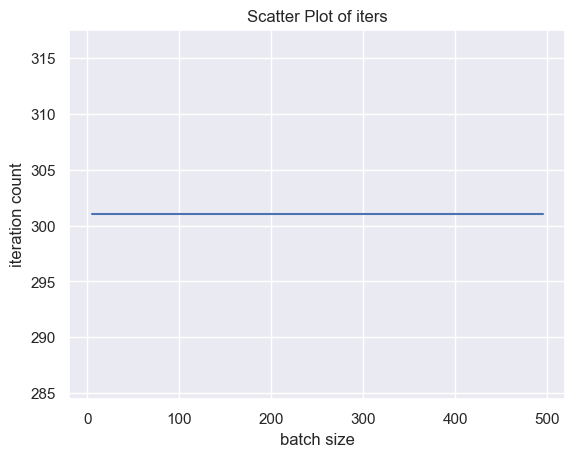

In [88]:
plt.plot(batch_sizes, sgd_iters)
plt.xlabel('batch size')
plt.ylabel('iteration count')
plt.title('Scatter Plot of iters')

plt.show()

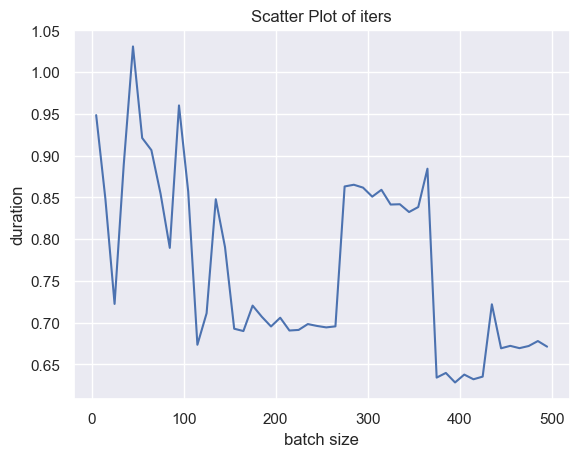

In [86]:
plt.plot(batch_sizes, duration)
plt.xlabel('batch size')
plt.ylabel('duration')
plt.title('Scatter Plot of iters')

plt.show()

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [90]:
grid = np.logspace(-4, 1, 20)

best_lambda = [0, 0, 0, 0]
best_mu = [0, 0, 0, 0]
score = [-1, -1, -1, -1]

losses_with_reg = [[], [], [], []]
iters_with_reg = [[], [], [], []]

names = ['adam', 'full', 'stochastic', 'momentum']

for i in range(4):
    for l in grid:
        for mu in grid:
            print(f"Testing {names[i]} with lambda = {l}, mu = {mu}")

            d = {'descent_name': names[i], 'regularized': True, 'kwargs': {'dimension': X_train.shape[1], 'lambda_': l, 'mu': mu}}

            lr = LinearRegression(d)
            lr.fit(X_train, y_train) 
            pred = lr.predict(X_val)  

            r2 = r2_score(y_val, pred)  
            
            loss = lr.calc_loss(X_train, y_train)
            losses_with_reg[i].append(loss)

            if r2 > score[i]:
                best_lambda[i] = l
                best_mu[i] = mu
                score[i] = r2
            
            iters_with_reg[i].append(len(lr.loss_history))

Testing adam with lambda = 0.0001, mu = 0.0001
Testing adam with lambda = 0.0001, mu = 0.00018329807108324357
Testing adam with lambda = 0.0001, mu = 0.0003359818286283781
Testing adam with lambda = 0.0001, mu = 0.0006158482110660267
Testing adam with lambda = 0.0001, mu = 0.0011288378916846883
Testing adam with lambda = 0.0001, mu = 0.00206913808111479
Testing adam with lambda = 0.0001, mu = 0.00379269019073225
Testing adam with lambda = 0.0001, mu = 0.0069519279617756054
Testing adam with lambda = 0.0001, mu = 0.012742749857031334
Testing adam with lambda = 0.0001, mu = 0.023357214690901212
Testing adam with lambda = 0.0001, mu = 0.04281332398719392
Testing adam with lambda = 0.0001, mu = 0.07847599703514607
Testing adam with lambda = 0.0001, mu = 0.14384498882876628
Testing adam with lambda = 0.0001, mu = 0.26366508987303583
Testing adam with lambda = 0.0001, mu = 0.4832930238571752
Testing adam with lambda = 0.0001, mu = 0.8858667904100823
Testing adam with lambda = 0.0001, mu = 1.

/Users/danyapetrovich/Desktop/ML_HW/ml-course-hse/2023-fall/homeworks-practice/homework-practice-03-gd/descents.py:80: RuntimeWarning: invalid value encountered in matmul
  x_w = x @ self.w
/Users/danyapetrovich/Desktop/ML_HW/ml-course-hse/2023-fall/homeworks-practice/homework-practice-03-gd/descents.py:90: RuntimeWarning: invalid value encountered in matmul
  return x @ self.w


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$\frac{\partial L}{\partial w} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial w}$\


$\frac{\partial L}{\partial a} = \frac{1}{cosh(a - y)} \cdot sinh(a-y)$\

$\frac{\partial a}{\partial w} = x \cdot tanh(wx - y)$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: